# Banking Marketing Campaign

## PRE-EDA

### Business Insight

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

### Description of the problem

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

### Dictionary

**age:** Age of customer (numeric) <br>
**job:** Type of job (categorical) <br>
**marital:** Marital status (categorical) <br>
**education:** Level of education (categorical) <br>
**default:** do you currently have credit (categorical) <br>
**housing:** do you have a housing loan (categorical) <br>
**loan:** Do you have a personal loan? (categorical) <br>
**contact:** Type of contact communication (categorical) <br>
**month:** Last month in which you have been contacted (categorical) <br>
**day_of_week:** Last day on which you have been contacted (categorical) <br>
**duration:** Duration of previous contact in seconds (numeric) <br>
**campaign:** Number of contacts made during this campaign to the customer (numeric) <br>
**pdays:** Number of days that elapsed since the last campaign until the customer was contacted (numeric) <br>
**previous:** Number of contacts made during the previous campaign to the customer (numeric) <br>
**poutcome:** Result of the previous marketing campaign (categorical). <br>
**emp.var.rate:** Employment variation rate. Quarterly indicator (numeric) <br>
**cons.price.idx:** Consumer price index. Monthly indicator (numeric) <br>
**cons.conf.idx:** Consumer confidence index. Monthly indicator (numeric) <br>
**euribor3m:** EURIBOR 3-month rate. Daily indicator (numeric) <br>
**nr.employed:** Number of employees. Quarterly indicator (numeric) <br>
**y:** TARGET. Whether the customer takes out a long-term deposit or not <br>

In [1]:
# Library Importings
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### EDA

In [2]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")

raw_df.to_csv("../data/raw/raw_df.csv")

raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
raw_df.drop("y", axis = 1).duplicated().sum()

12

In [6]:
processed_df = raw_df.drop_duplicates().reset_index(drop = True).copy()
processed_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
processed_df.drop("y", axis = 1).duplicated().sum()

0

In [8]:
processed_df.duplicated().sum()

0

In [9]:
processed_df.drop("y", axis = 1).isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

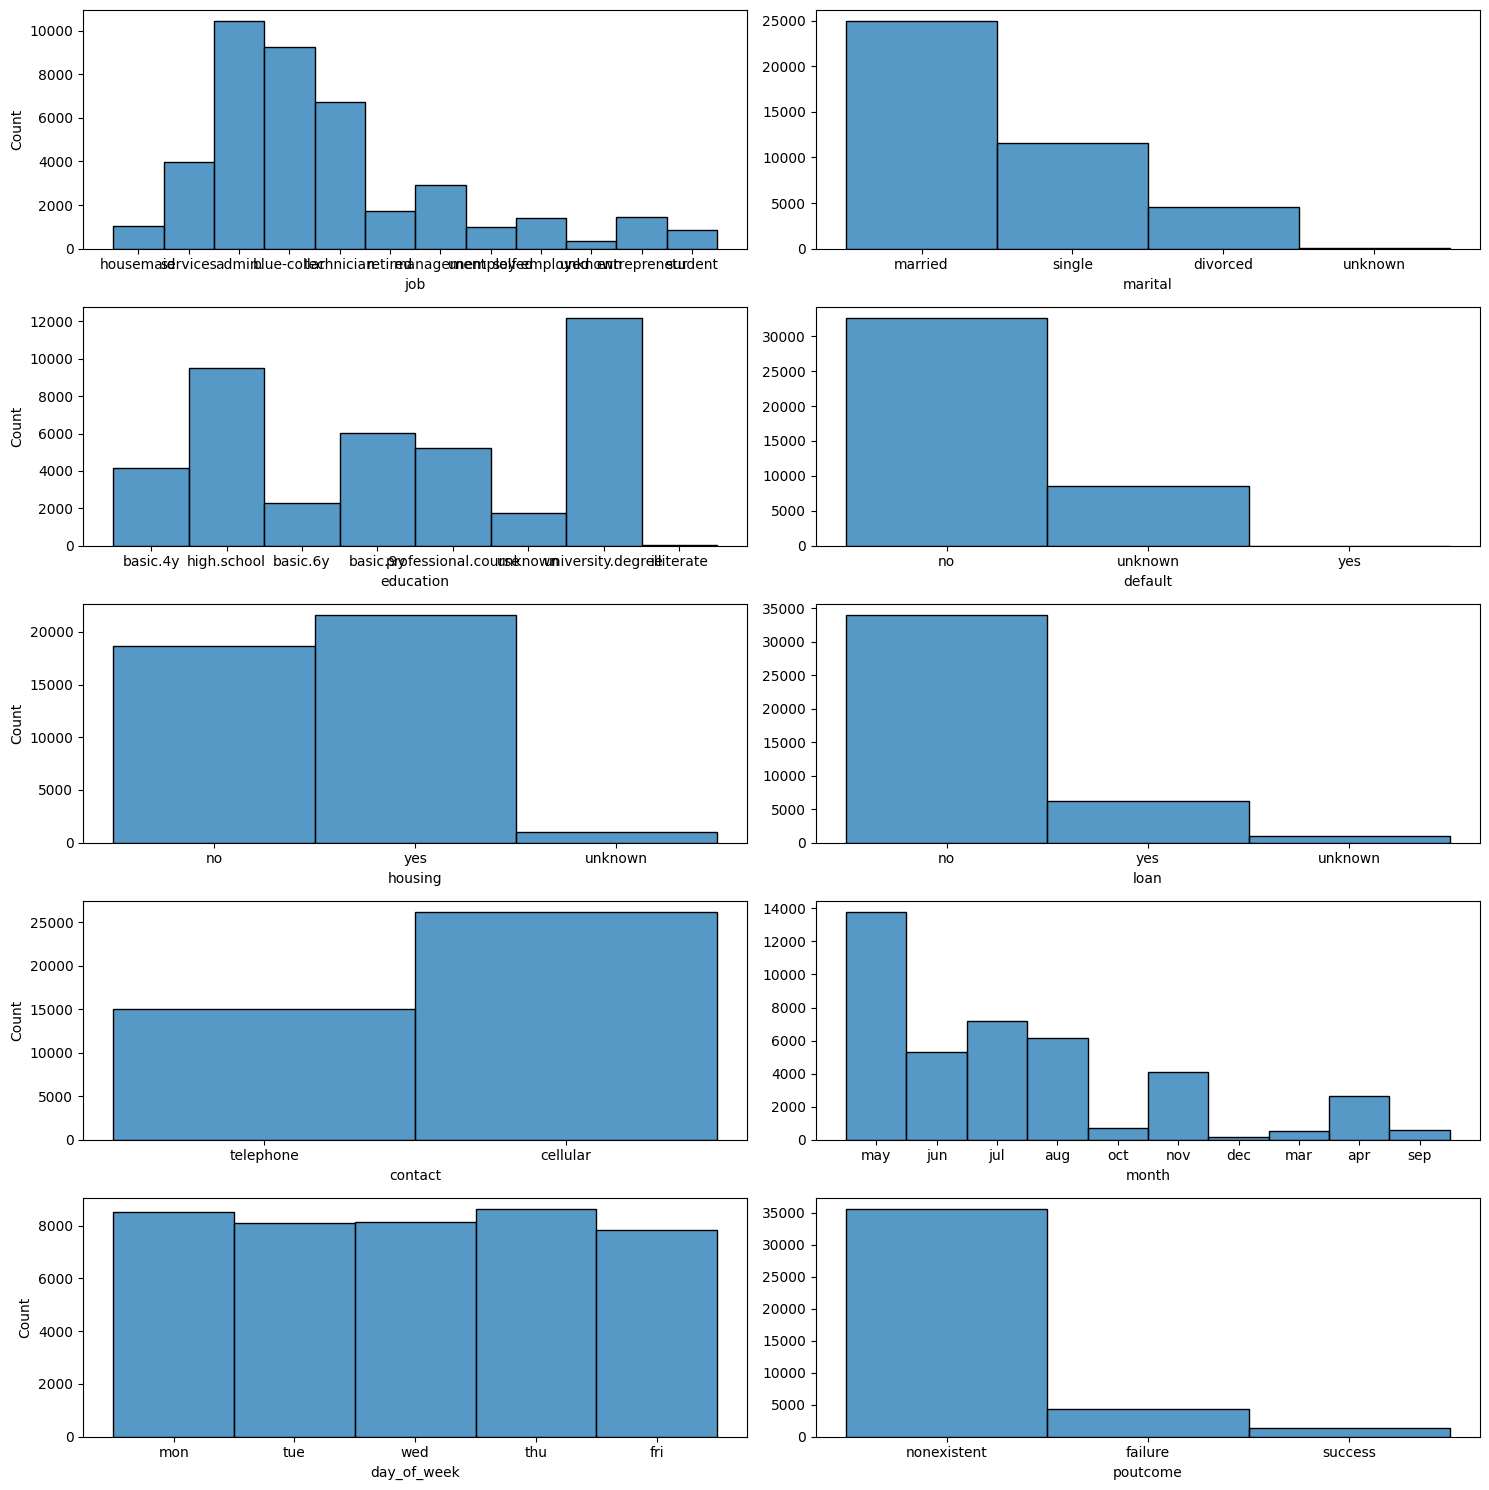

In [10]:
fig, axis = plt.subplots(5, 2, figsize = (15, 15))

sns.histplot(ax = axis[0, 0], data = processed_df, x = "job")
sns.histplot(ax = axis[0, 1], data = processed_df, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = processed_df, x = "education")
sns.histplot(ax = axis[1, 1], data = processed_df, x = "default").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = processed_df, x = "housing")
sns.histplot(ax = axis[2, 1], data = processed_df, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = processed_df, x = "contact")
sns.histplot(ax = axis[3, 1], data = processed_df, x = "month").set(ylabel = None)
sns.histplot(ax = axis[4, 0], data = processed_df, x = "day_of_week")
sns.histplot(ax = axis[4, 1], data = processed_df, x = "poutcome").set(ylabel = None)

plt.tight_layout()

plt.show()

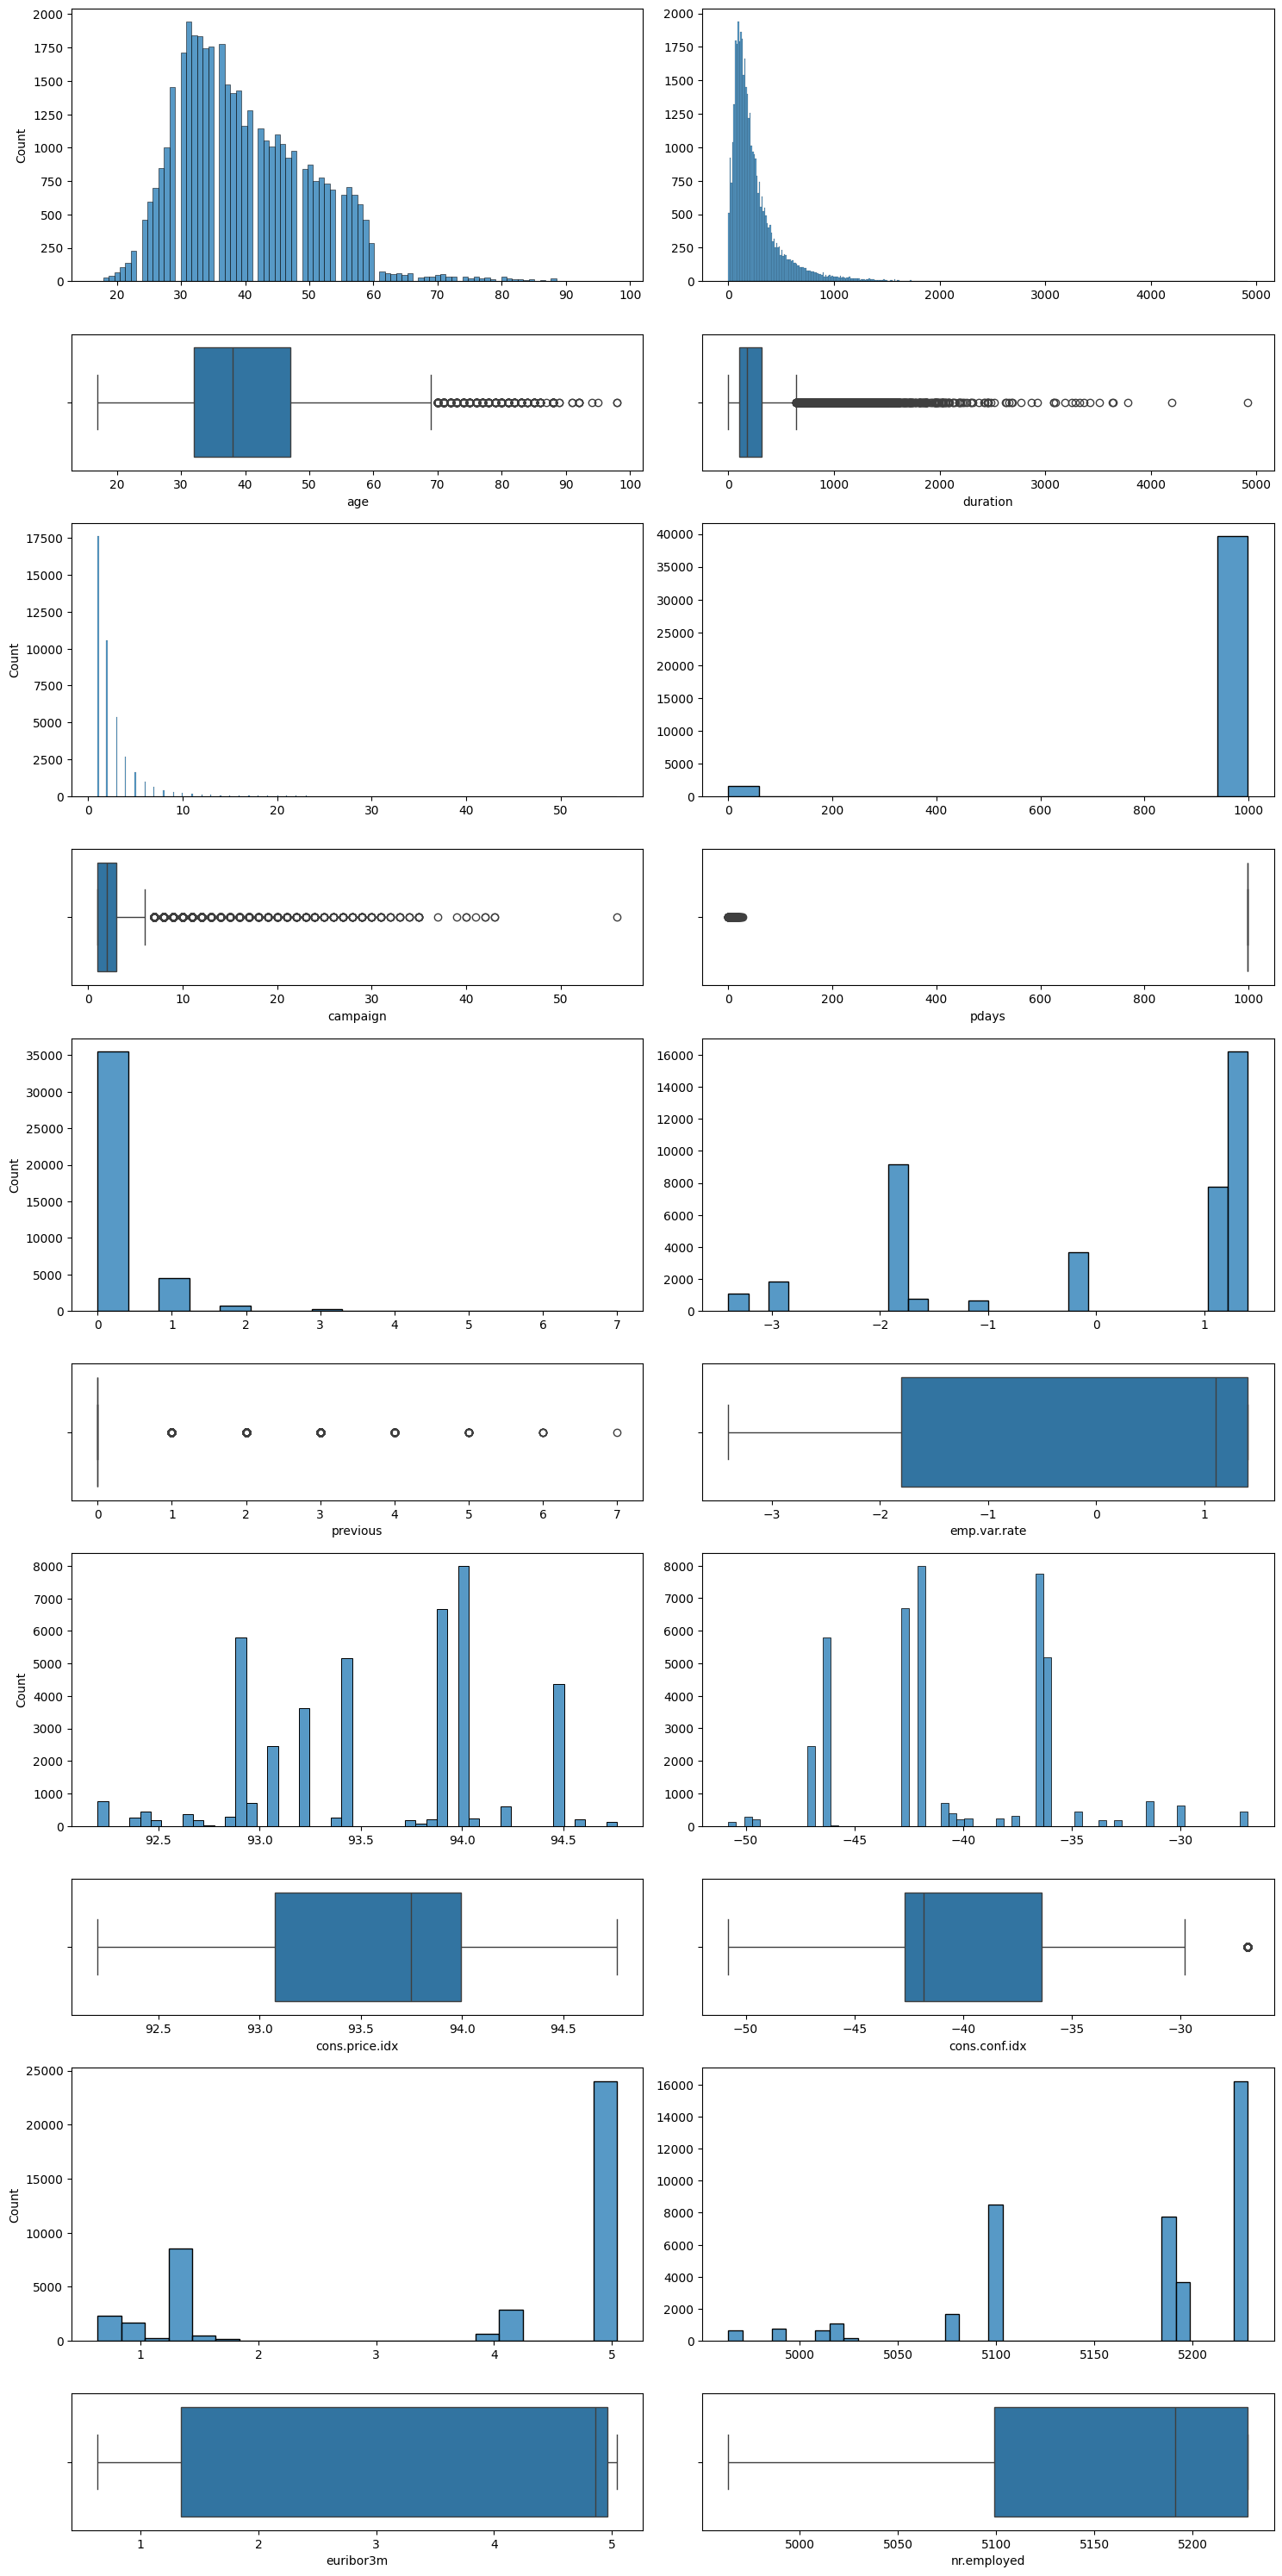

In [11]:
fig, axis = plt.subplots(10, 2, figsize = (15, 30), gridspec_kw={'height_ratios': [4,2,4,2,4,2,4,2,4,2]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = processed_df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = processed_df, x = "age")
sns.histplot(ax = axis[0, 1], data = processed_df, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = processed_df, x = "duration")
sns.histplot(ax = axis[2, 0], data = processed_df, x = "campaign").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = processed_df, x = "campaign")
sns.histplot(ax = axis[2, 1], data = processed_df, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = processed_df, x = "pdays")
sns.histplot(ax = axis[4, 0], data = processed_df, x = "previous").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = processed_df, x = "previous")
sns.histplot(ax = axis[4, 1], data = processed_df, x = "emp.var.rate").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = processed_df, x = "emp.var.rate")
sns.histplot(ax = axis[6, 0], data = processed_df, x = "cons.price.idx").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = processed_df, x = "cons.price.idx")
sns.histplot(ax = axis[6, 1], data = processed_df, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[7, 1], data = processed_df, x = "cons.conf.idx")
sns.histplot(ax = axis[8, 0], data = processed_df, x = "euribor3m").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = processed_df, x = "euribor3m")
sns.histplot(ax = axis[8, 1], data = processed_df, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[9, 1], data = processed_df, x = "nr.employed")

plt.tight_layout()

plt.show()

### Scaling

In [12]:
processed_df["job_n"] = pd.factorize(processed_df["job"])[0]
processed_df["marital_n"] = pd.factorize(processed_df["marital"])[0]
processed_df["education_n"] = pd.factorize(processed_df["education"])[0]
processed_df["default_n"] = pd.factorize(processed_df["default"])[0]
processed_df["housing_n"] = pd.factorize(processed_df["housing"])[0]
processed_df["loan_n"] = pd.factorize(processed_df["loan"])[0]
processed_df["contact_n"] = pd.factorize(processed_df["contact"])[0]
processed_df["month_n"] = pd.factorize(processed_df["month"])[0]
processed_df["day_of_week_n"] = pd.factorize(processed_df["day_of_week"])[0]
processed_df["poutcome_n"] = pd.factorize(processed_df["poutcome"])[0]
processed_df["y_n"] = pd.factorize(processed_df["y"])[0]
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(processed_df[num_variables])
processed_df_scal = pd.DataFrame(scal_features, index = processed_df.index, columns = num_variables)
processed_df_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


### Feature Selection

In [13]:
X = processed_df_scal.drop("y_n", axis = 1)
y = processed_df_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1212)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
accuracy_score(y_test, y_pred)

0.9113647401651287

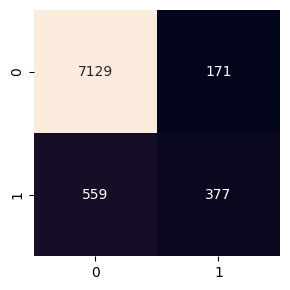

In [16]:
campaign_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(campaign_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()